**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [117]:
# Write your code here
import numpy as np
from types import SimpleNamespace
from scipy import optimize
from scipy.optimize import fsolve
from scipy.optimize import minimize_scalar

import matplotlib.pyplot as plt

import problem1
import problem2
import problem3

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [118]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

### 1.1 consumer

In [119]:
#consumer utility function
def utility(c1, c2, l, par):
    """utility for consumer"""

    return np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * l**(1 + par.epsilon) / (1 + par.epsilon)#par.nu * l**(1 + 1/par.epsilon) / (1 + 1/par.epsilon)

def consumer(p_1, p_2, w, par):
    """maximize utility for consumer"""

    pi_1 = ((1 - par.gamma) / par.gamma) * w * ((p_1 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))
    pi_2 = ((1 - par.gamma) / par.gamma) * w * ((p_2 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))

    def obj(l):

        c1 = par.alpha * (w * l + par.T + pi_1 + pi_2) / p_1
        c2 = (1 - par.alpha) * (w * l + par.T + pi_1 + pi_2) / (p_2 + par.tau)
        return -utility(c1, c2, l, par)
    
    res = optimize.minimize_scalar(obj,bounds=(0,1),method='bounded')

    l_star_c = res.x
    c1_star_c = par.alpha * (w * l_star_c + par.T + pi_1 + pi_2) / p_1
    c2_star_c = (1 - par.alpha) * (w * l_star_c + par.T + pi_1 + pi_2) / (p_2 + par.tau)
    
    return c1_star_c, c2_star_c, l_star_c
    

In [120]:
w=1.0
for p_1 in [0.5,1,1.5]:
    for p_2 in [0.5,1,1.5]:
        c1,c2,l = consumer(p_1,p_2,w,par)
        print(f'p_1 = {p_1:.2f}, p_2 = {p_2:.2f} -> c1 = {c1:.2f}, c2 = {c2:.2f}, l = {l:.2f}')

p_1 = 0.50, p_2 = 0.50 -> c1 = 0.65, c2 = 1.52, l = 0.96
p_1 = 0.50, p_2 = 1.00 -> c1 = 0.73, c2 = 0.85, l = 0.91
p_1 = 0.50, p_2 = 1.50 -> c1 = 0.87, c2 = 0.68, l = 0.83
p_1 = 1.00, p_2 = 0.50 -> c1 = 0.37, c2 = 1.71, l = 0.91
p_1 = 1.00, p_2 = 1.00 -> c1 = 0.41, c2 = 0.95, l = 0.86
p_1 = 1.00, p_2 = 1.50 -> c1 = 0.48, c2 = 0.75, l = 0.79
p_1 = 1.50, p_2 = 0.50 -> c1 = 0.29, c2 = 2.04, l = 0.83
p_1 = 1.50, p_2 = 1.00 -> c1 = 0.32, c2 = 1.12, l = 0.79
p_1 = 1.50, p_2 = 1.50 -> c1 = 0.37, c2 = 0.87, l = 0.73


### 1.2 firm 1 and 2

In [121]:
def firm_1(p_1, w, par):
    """maximize profit for firm 1"""

    l_star_f1 = ((p_1 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))
    y_star_f1 = par.A * (l_star_f1) ** par.gamma
    pi_star_f1 = ((1 - par.gamma) / par.gamma) * w * ((p_1 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))

    return l_star_f1, y_star_f1, pi_star_f1

def firm_2(p_2, w, par):
    """maximize profit for firm 2"""

    l_star_f2 = ((p_2 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))
    y_star_f2 = par.A * (l_star_f2) ** par.gamma
    pi_star_f2 = ((1 - par.gamma) / par.gamma) * w * ((p_2 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))

    return l_star_f2, y_star_f2, pi_star_f2

In [122]:
w=1.0
for p_1 in [0.5,1,1.5]:
    l_star_f1,y_star_f1,pi_star_f1 = firm_1(p_1, w, par)
    print(f'p_1 = {p_1:.2f}, -> l_star_f1 = {l_star_f1:.2f}, y_star_f1 = {y_star_f1:.2f}, pi_stat_f1 = {pi_star_f1:.2f}')

for p_2 in [0.5,1,1.5]:
    l_star_f2,y_star_f2,pi_star_f2 = firm_2(p_2, w, par)
    print(f'p_2 = {p_2:.2f}, -> l_star_f2 = {l_star_f2:.2f}, y_star_f2 = {y_star_f2:.2f}, pi_stat_f2 = {pi_star_f2:.2f}')

p_1 = 0.50, -> l_star_f1 = 0.06, y_star_f1 = 0.25, pi_stat_f1 = 0.06
p_1 = 1.00, -> l_star_f1 = 0.25, y_star_f1 = 0.50, pi_stat_f1 = 0.25
p_1 = 1.50, -> l_star_f1 = 0.56, y_star_f1 = 0.75, pi_stat_f1 = 0.56
p_2 = 0.50, -> l_star_f2 = 0.06, y_star_f2 = 0.25, pi_stat_f2 = 0.06
p_2 = 1.00, -> l_star_f2 = 0.25, y_star_f2 = 0.50, pi_stat_f2 = 0.25
p_2 = 1.50, -> l_star_f2 = 0.56, y_star_f2 = 0.75, pi_stat_f2 = 0.56


### Market clearing 

In [123]:
# Check market clearing conditions
w = 1  # Numeraire

# Price ranges
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)

market_clearing_results = []

for p1 in p1_range:
    for p2 in p2_range:
        c1_star_c, c2_star_c, l_star_c = consumer(p_1, p_2, w, par)
        l_star_f1, y_star_f1, pi_star_f1 = firm_1(p_1, w, par)
        l_star_f2, y_star_f2, pi_star_f2 = firm_2(p_2, w, par)
        
        # Market clearing conditions
        market_clearing_y1 = np.isclose(y_star_f1, c1_star_c)
        market_clearing_y2 = np.isclose(y_star_f2, c2_star_c)
        
        market_clearing_results.append((p1, p2, market_clearing_y1, market_clearing_y2))

# Display results
print("p1\tp2\tMarket Clearing for Good 1\tMarket Clearing for Good 2")
for result in market_clearing_results:
    p1, p2, market_clearing_y1, market_clearing_y2 = result
    print(f"{p1:.2f}\t{p2:.2f}\t{market_clearing_y1}\t\t\t{market_clearing_y2}")

p1	p2	Market Clearing for Good 1	Market Clearing for Good 2
0.10	0.10	False			False
0.10	0.31	False			False
0.10	0.52	False			False
0.10	0.73	False			False
0.10	0.94	False			False
0.10	1.16	False			False
0.10	1.37	False			False
0.10	1.58	False			False
0.10	1.79	False			False
0.10	2.00	False			False
0.31	0.10	False			False
0.31	0.31	False			False
0.31	0.52	False			False
0.31	0.73	False			False
0.31	0.94	False			False
0.31	1.16	False			False
0.31	1.37	False			False
0.31	1.58	False			False
0.31	1.79	False			False
0.31	2.00	False			False
0.52	0.10	False			False
0.52	0.31	False			False
0.52	0.52	False			False
0.52	0.73	False			False
0.52	0.94	False			False
0.52	1.16	False			False
0.52	1.37	False			False
0.52	1.58	False			False
0.52	1.79	False			False
0.52	2.00	False			False
0.73	0.10	False			False
0.73	0.31	False			False
0.73	0.52	False			False
0.73	0.73	False			False
0.73	0.94	False			False
0.73	1.16	False			False
0.73	1.37	False			False
0.73	1.58	False			False
0.73	1.79	False			False
0.73

This means that there are no prices in the vector $p_1$ and $p_2$ there is clearing more than 1 of the markets.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [124]:
# Market clearing conditions
def market_clearing(prices):
    p_1, p_2 = prices
    c1_star_c, c2_star_c, l_star_c = consumer(p_1, p_2, w, par)
    l_star_f1, y_star_f1, pi_star_f1 = firm_1(p_1, w, par)
    l_star_f2, y_star_f2, pi_star_f2 = firm_2(p_2, w, par)
    
    # Market clearing conditions
    market_clearing_y1 = y_star_f1 - c1_star_c
    market_clearing_y2 = y_star_f2 - c2_star_c
    
    return [market_clearing_y1, market_clearing_y2]

# Initial guess for prices
initial_guess = [0.1, 0.1]

# Find equilibrium prices
equilibrium_prices = fsolve(market_clearing, initial_guess)
p1_eq, p2_eq = equilibrium_prices

print(f"Equilibrium price for good 1: {p1_eq}")
print(f"Equilibrium price for good 2: {p2_eq}")

Equilibrium price for good 1: 0.9759308856158176
Equilibrium price for good 2: 1.4907590521266094


### Checking that the markets cleared

In [125]:
w=1.0
p1_vals = np.linspace(0.9759308856158176, 0.9759308856158176, 1)
p2_vals = np.linspace(1.4907590521266094, 1.4907590521266094, 1)

for p_1 in p1_vals:
    for p_2 in p2_vals:
        c1_star_c, c2_star_c, l_star_c = consumer(p_1, p_2, w, par)
        l_star_f1, y_star_f1, pi_star_f1 = firm_1(p_1, w, par)
        l_star_f2, y_star_f2, pi_star_f2 = firm_2(p_2, w, par)
        l_sum = l_star_f1 + l_star_f2
        clear_market_1 = c1_star_c - y_star_f1
        clear_market_2 = c2_star_c - y_star_f2
        clear_labor_market = l_star_c -l_sum

        if clear_market_1<0.09 and clear_market_2<0.09 and clear_labor_market<0.09:
            print(f'p_1 = {p_1:.4f}, p_2 = {p_2:.4f} -> clear_market_1 = {clear_market_1:.10f} > clear_market_2 = {clear_market_2:.10f} -> clear_labor_market = {clear_labor_market:.10f} ')


p_1 = 0.9759, p_2 = 1.4908 -> clear_market_1 = 0.0000000000 > clear_market_2 = 0.0000000000 -> clear_labor_market = 0.0000000000 


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [126]:
# Social welfare function
w = 1.0

def social_welfare(tau, par):
    p1 = 1
    p2 = 1
    T = tau * c2_initial_guess  # Initial guess for T based on tau
    l_star_f1, y_star_f1, pi_star_f1 = firm_1(p1, w, par)
    l_star_f2, y_star_f2, pi_star_f2 = firm_2(p1, w, par)
    c1_star_c, c2_star_c, l_star_c = consumer(p1, p2, w, par)
    u = np.log(c1_star_c**par.alpha * c2_star_c**(1 - par.alpha)) - par.nu * l_star_c**(1 + par.epsilon) / (1 + par.epsilon)
    return -(u - par.kappa * y_star_f2)  # Negate for minimization

# Initial guess for c2 to estimate T
par.tau = 0.1
par.T = 0.1 * y_star_f2
l_star_f1, y_star_f1, pi_star_f1 = firm_1(1, w, par)
l_star_f2, y_star_f2, pi_star_f2 = firm_2(1, w, par)
c1_star_c, c2_initial_guess, l_star_c = consumer(1, 1, w, par)
u = np.log(c1_star_c**par.alpha * c2_star_c**(1 - par.alpha)) - par.nu * l_star_c**(1 + par.epsilon) / (1 + par.epsilon)

# Optimize tau to maximize social welfare
result = minimize_scalar(lambda tau: social_welfare(tau, par), bounds=(0, 1), method='bounded')
optimal_tau = result.x

# Calculate T based on optimal tau
par.tau = optimal_tau
par.T = optimal_tau * c2_initial_guess
l_star_f1, y_star_f1, pi_star_f1 = firm_1(1, w, par)
l_star_f2, y_star_f2, pi_star_f2 = firm_2(1, w, par)
c1_star_c, c2_star_c, l_star_c = consumer(1, 1, w, par)
u = np.log(c1_star_c**par.alpha * c2_star_c**(1 - par.alpha)) - par.nu * l_star_c**(1 + par.epsilon) / (1 + par.epsilon)
optimal_T = optimal_tau * c2_star_c

print(f"Optimal tau: {optimal_tau}")
print(f"Optimal T: {optimal_T}")

Optimal tau: 0.9999940391390134
Optimal T: 0.7321775302465866


The optimal tau needs to be aproximately 1 in order for the social welfare function to be maximized

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [127]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [128]:
from problem2 import calculate_utility

# Calculate expected utilities
expected_utilities, realised_utilities = calculate_utility(par)

# Print the expected utilities
print(f'Expected Utilities: v[{par.v[0]}, {par.v[1]}, {par.v[2]}]')
print(expected_utilities)
print(f'Realised Utilities: v[{par.v[0]}, {par.v[1]}, {par.v[2]}]')
print(realised_utilities)

Expected Utilities: v[1, 2, 3]
[1.01180472 2.02556341 3.00688206]
Realised Utilities: v[1, 2, 3]
[1.01180472 2.02556341 3.00688206]


As We see above the expected utility is the same as the average of 10000 realisations of $u_{i,j}^k$. 

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

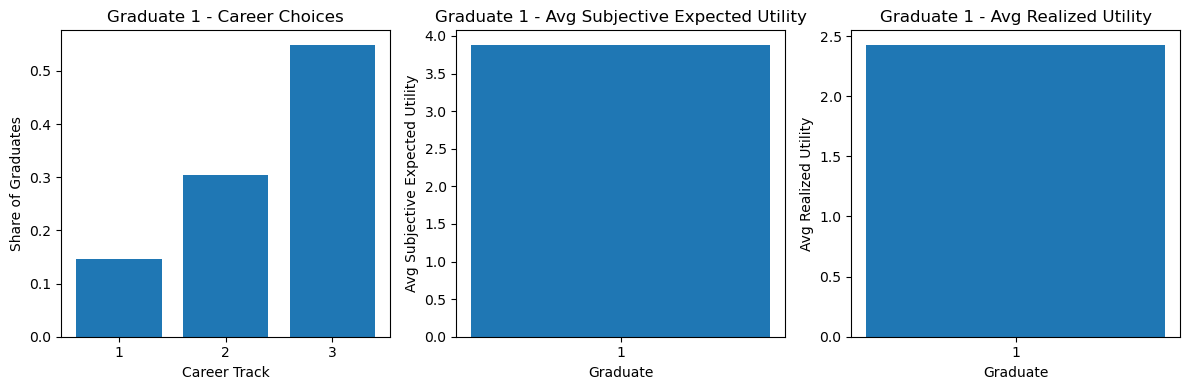

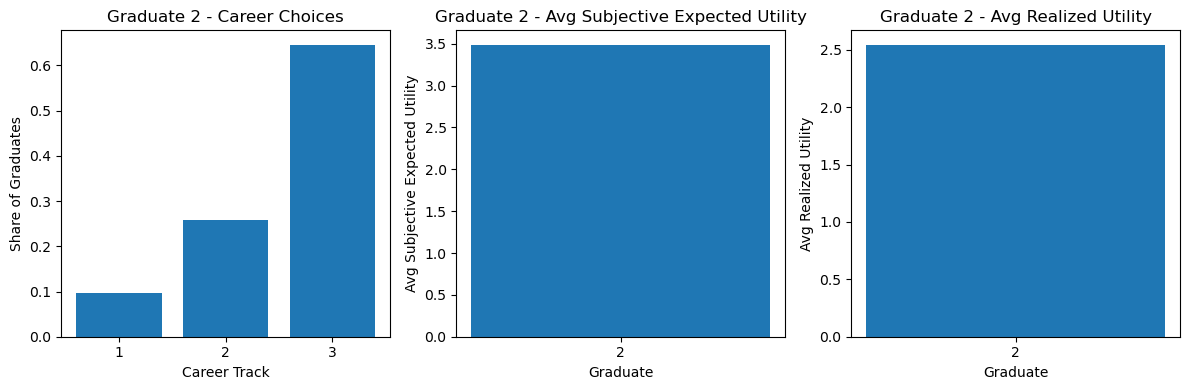

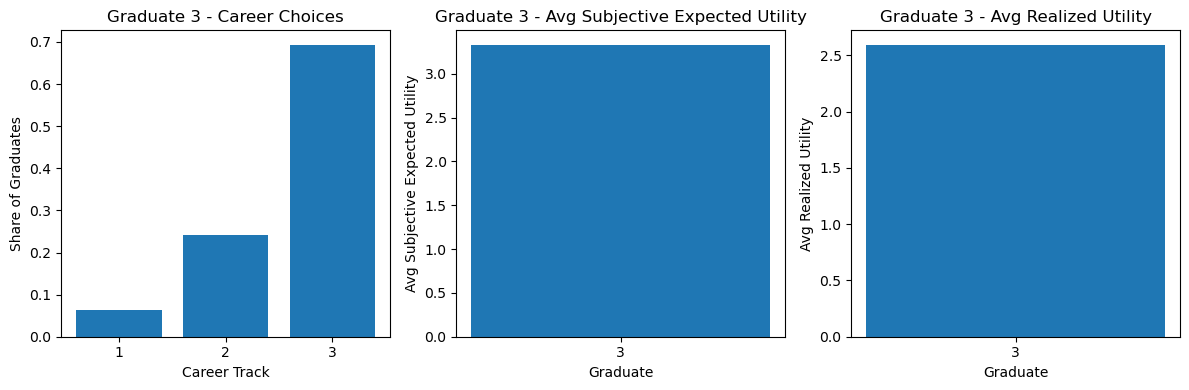

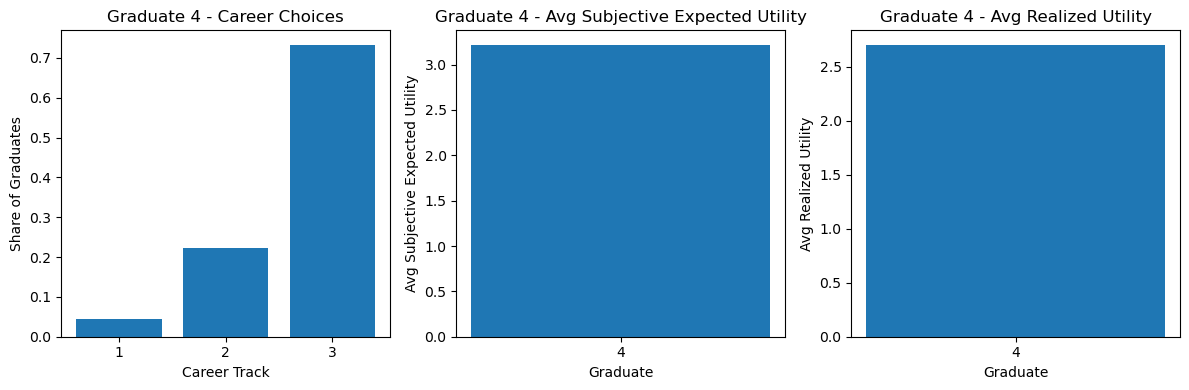

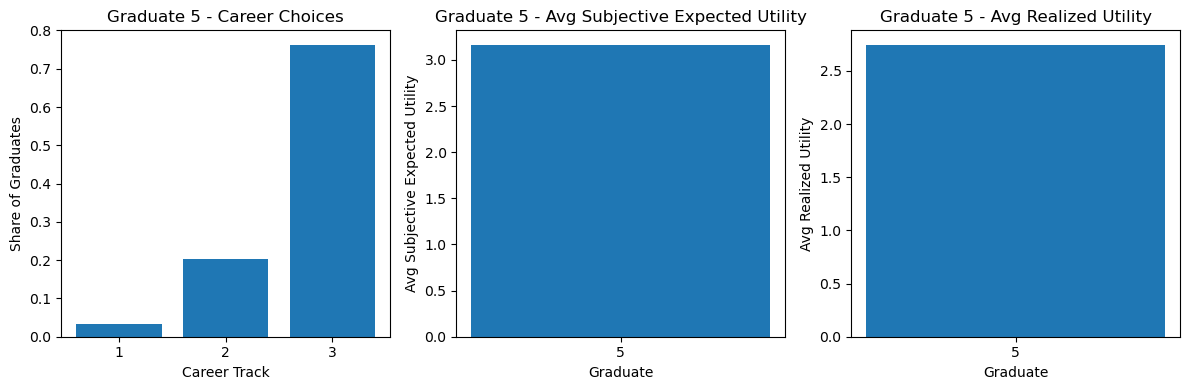

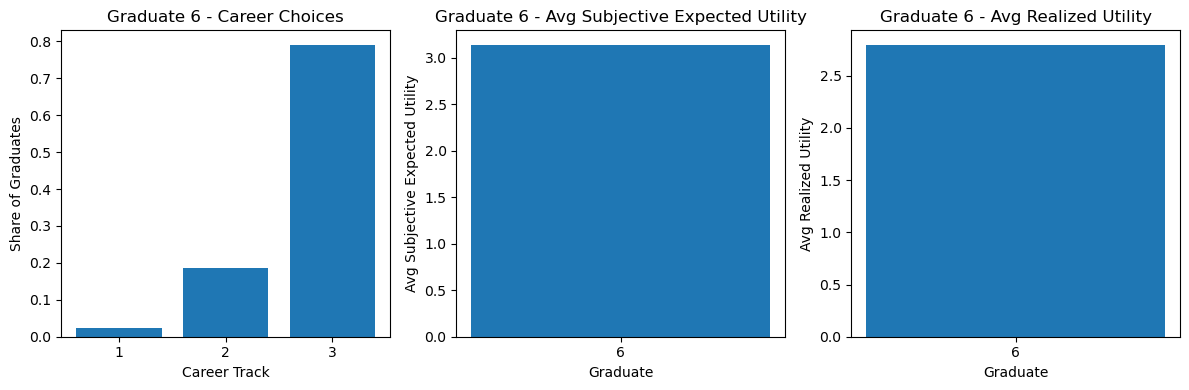

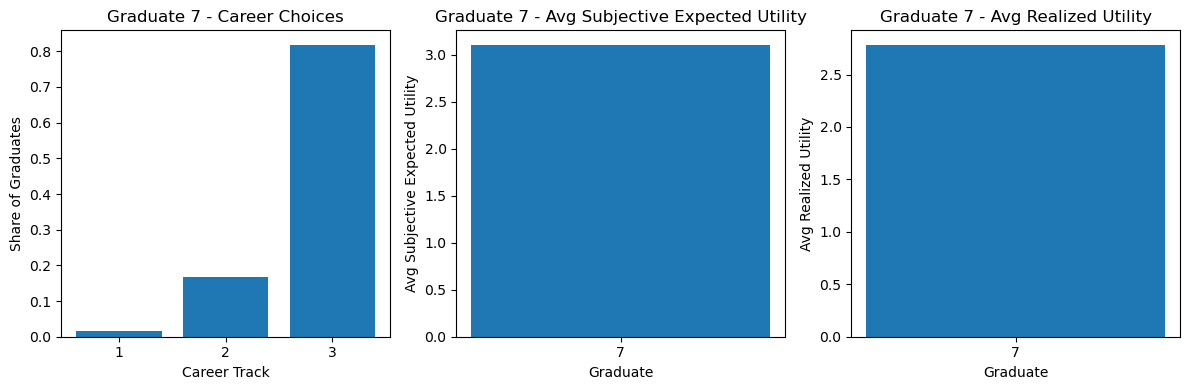

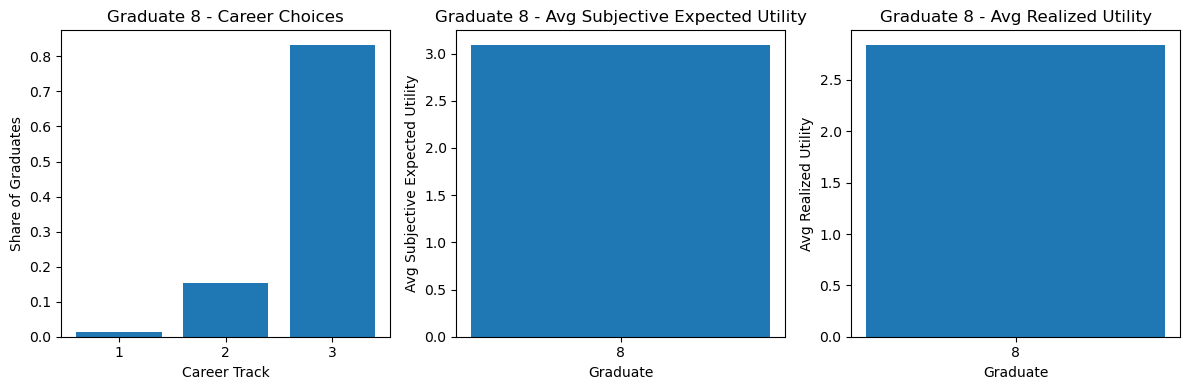

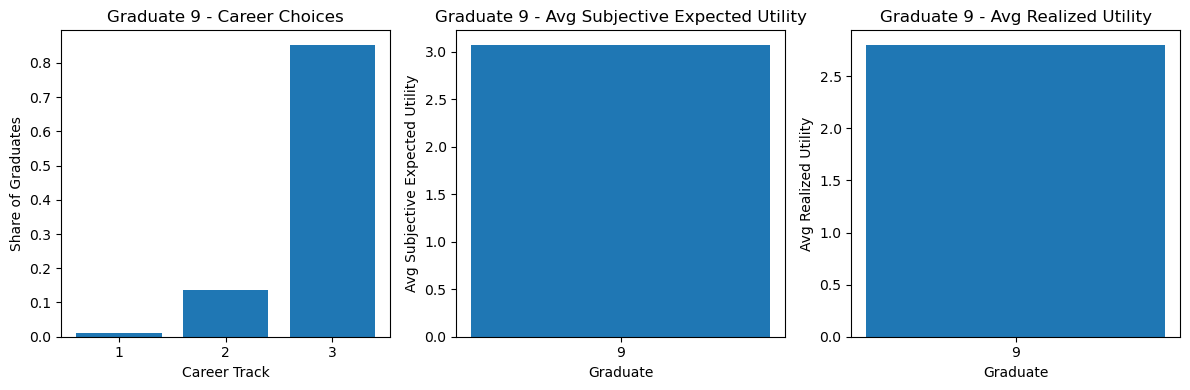

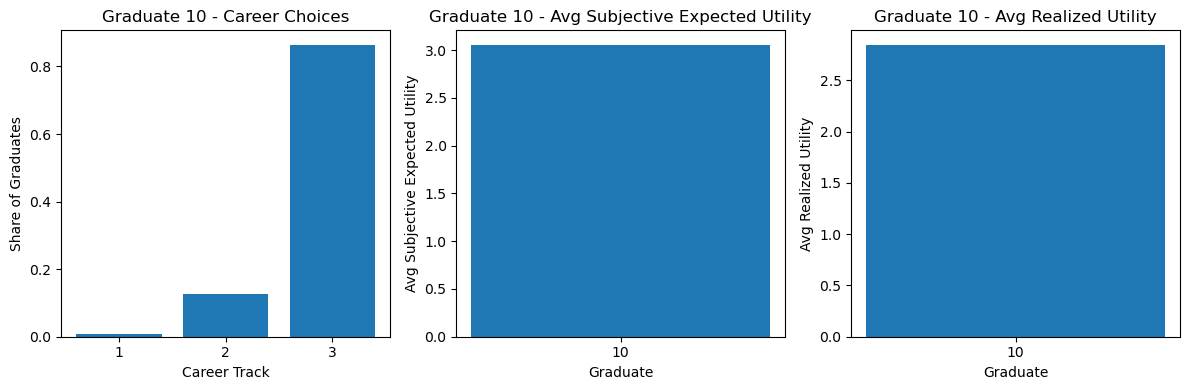

In [129]:
from problem2 import simulate_and_visualize

# Run the simulation and visualize the results
simulate_and_visualize(par)

Here we see that the first graduate 1. with one friend in each career, more often chose career path 1 or 2 than graduate 10. who has ten friends in each career path. It can be seen that the more friends in each career path the closer Avg Subjective Expected utility is to the Avg Realized Utility. This is due to more information about the real utility.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

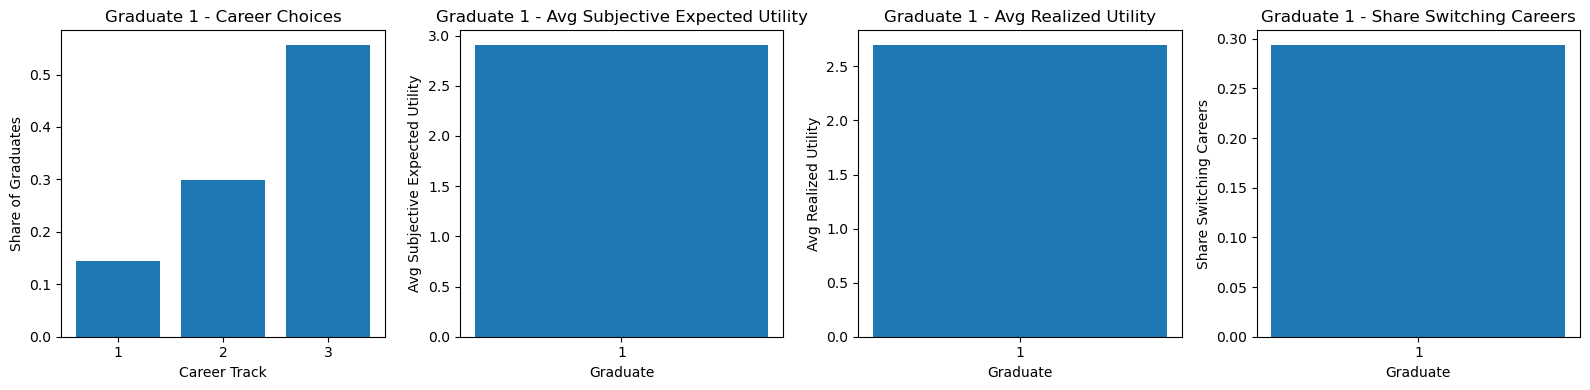

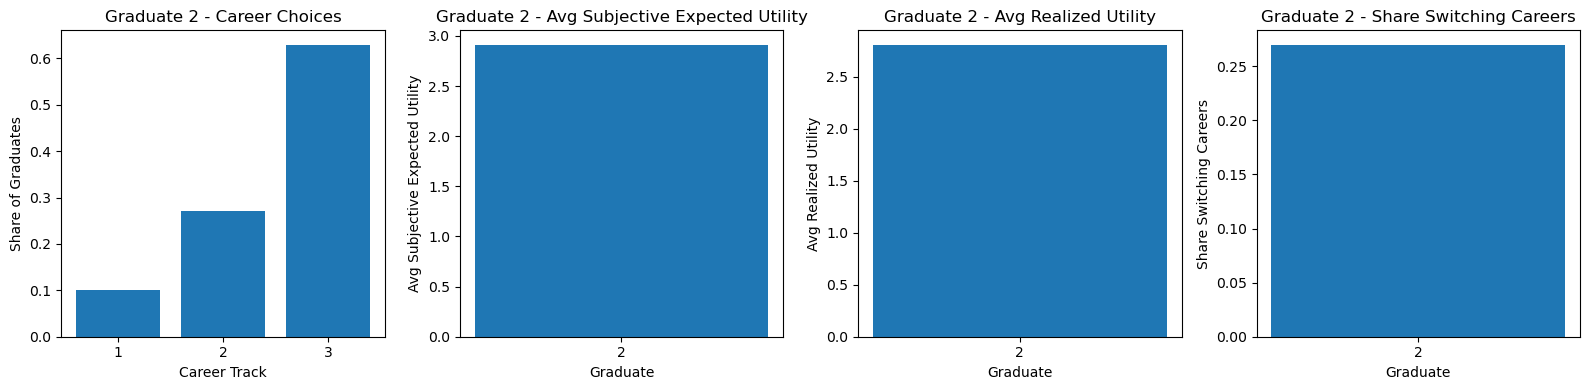

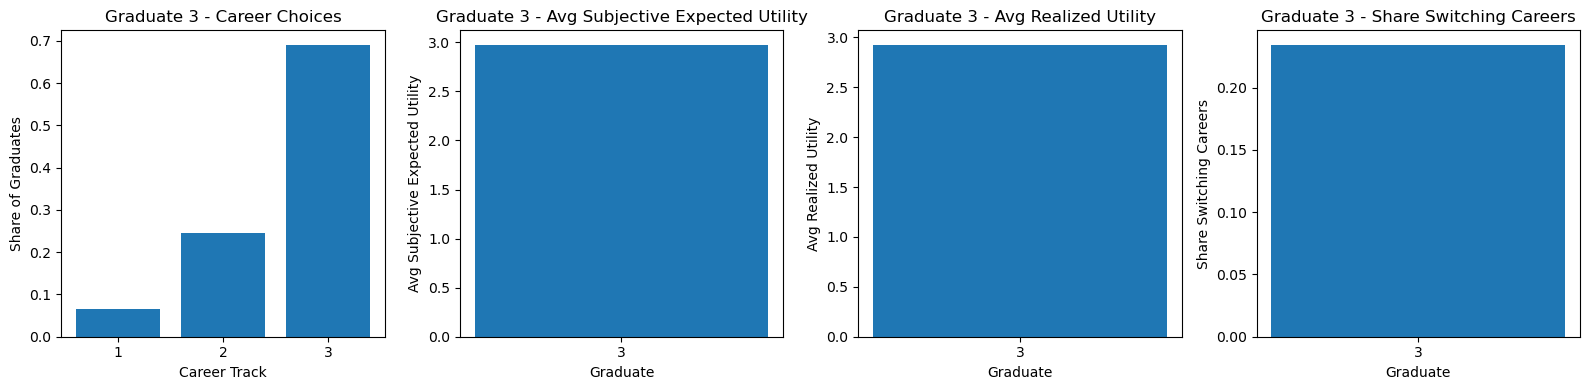

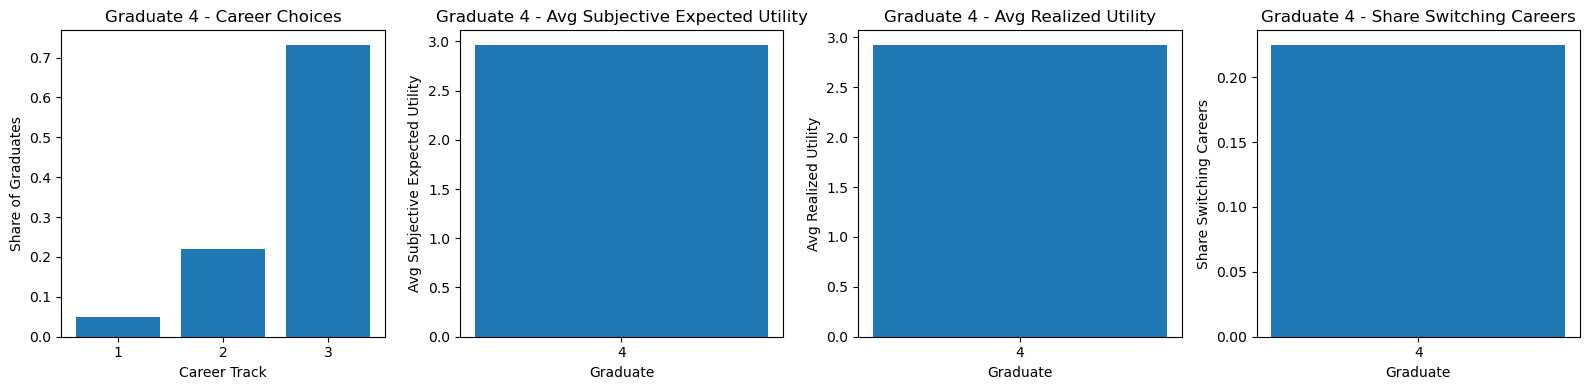

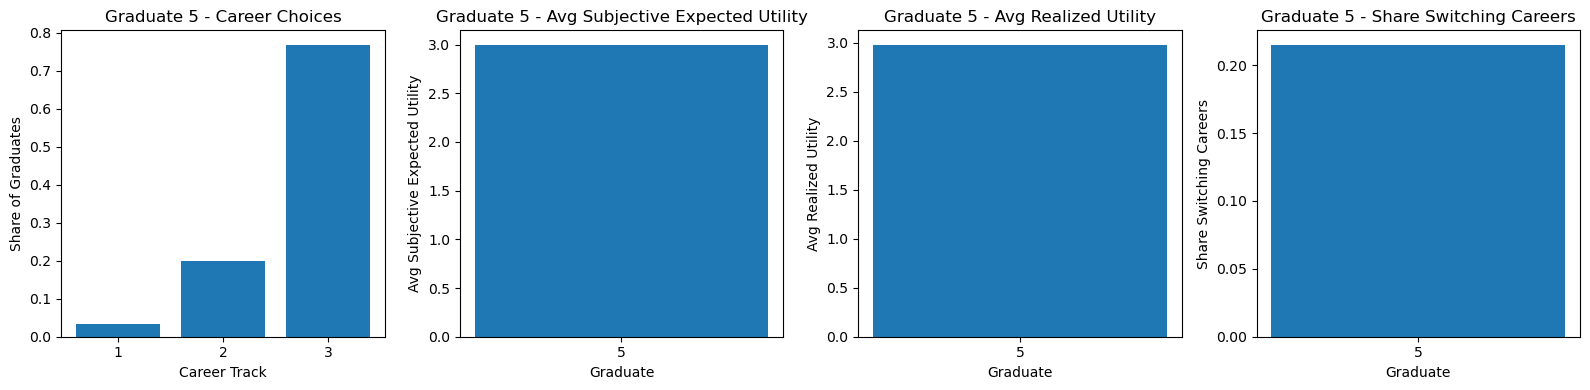

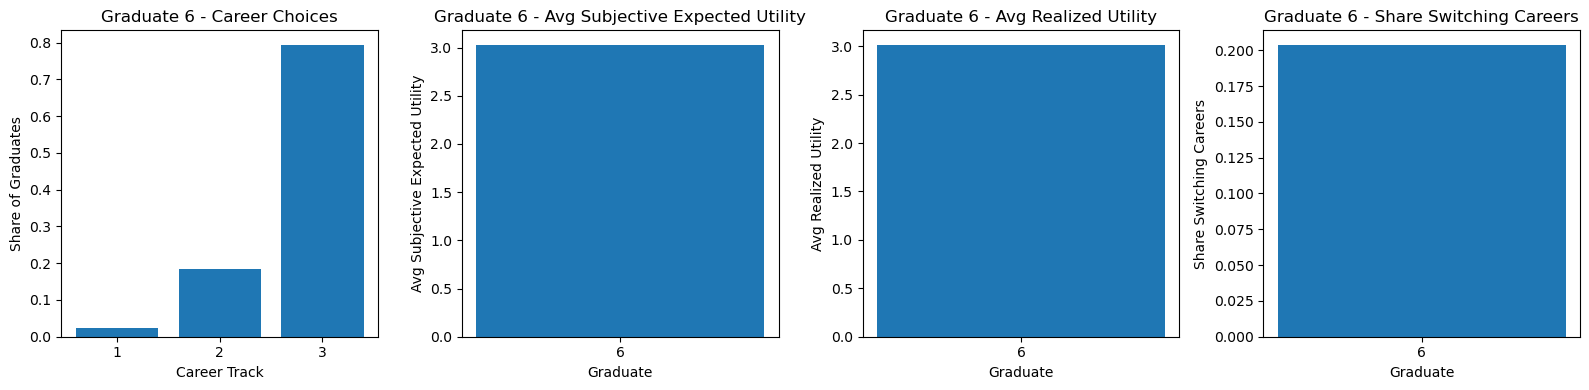

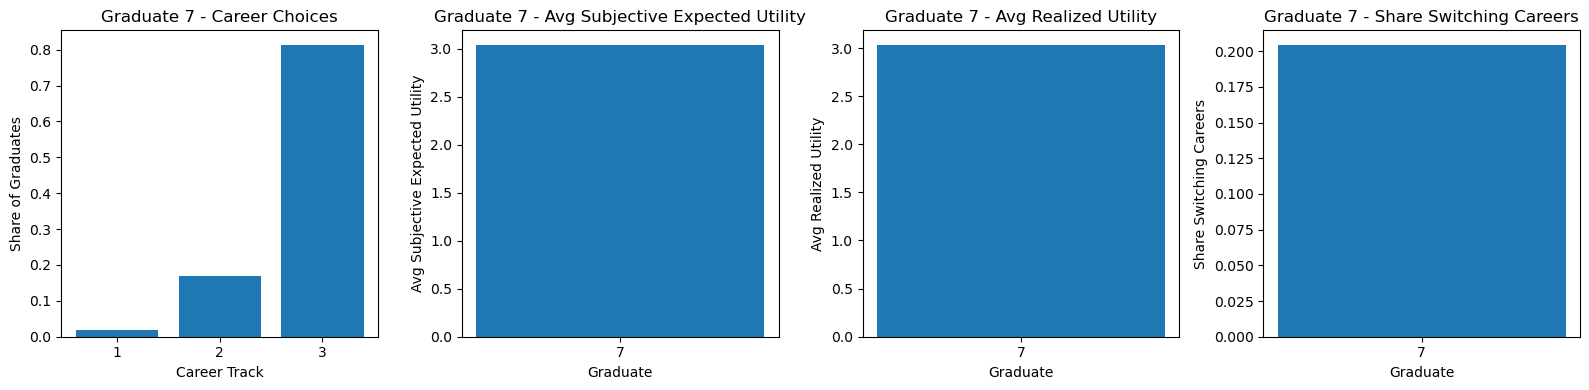

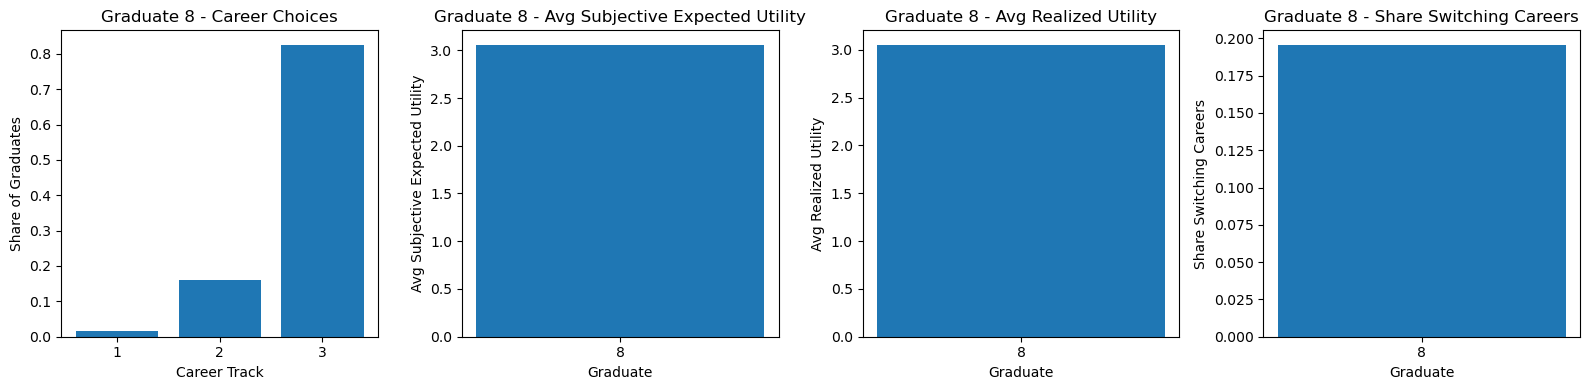

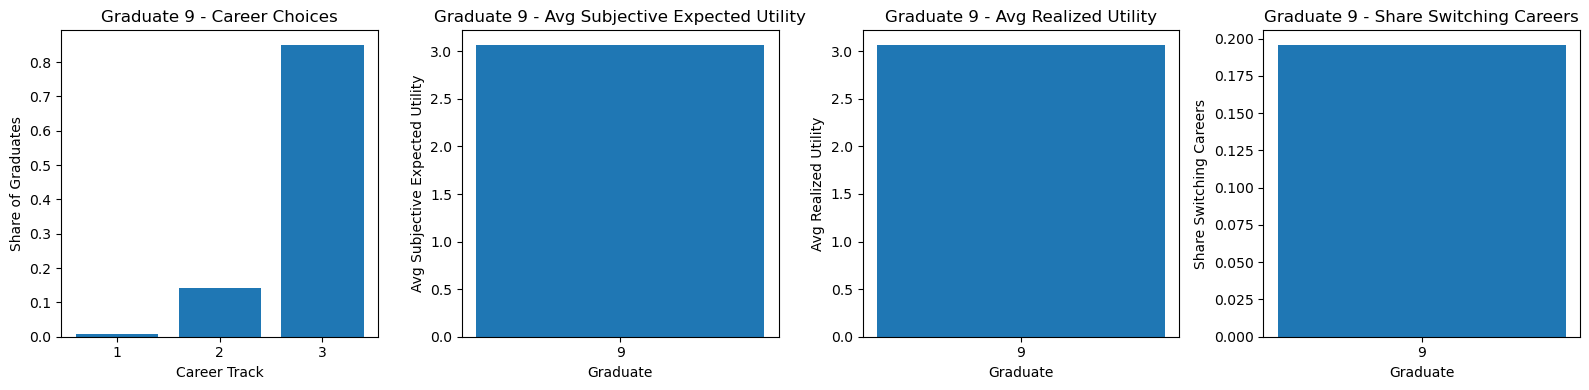

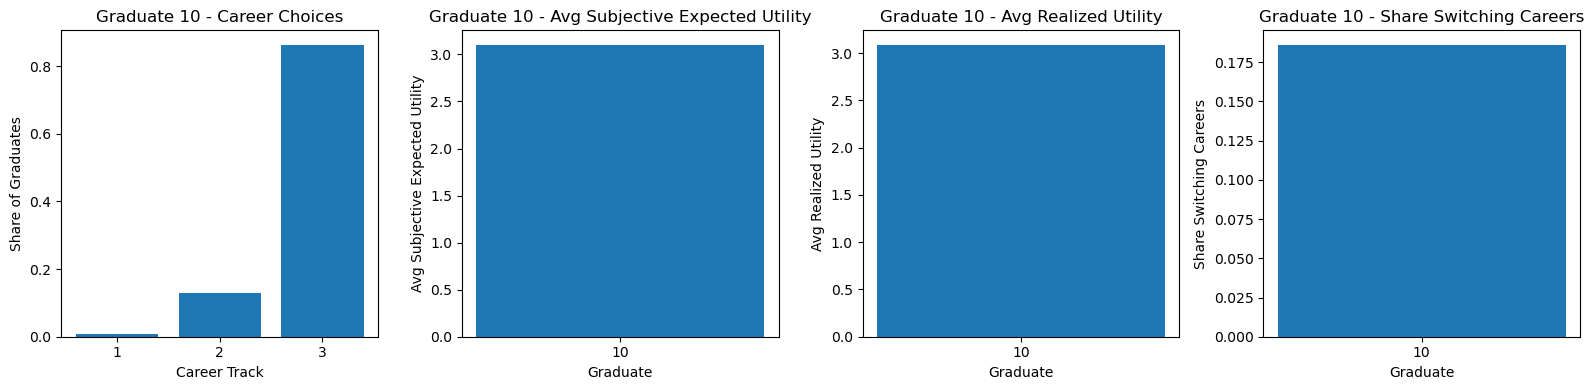

In [130]:
from problem2 import simulate_and_visualize2

# Run the simulation and visualize the results
simulate_and_visualize2(par)

We can see that the share of graduates switching careers is diminishing for graduates in i $\in$ {1,2…,10}

This is due to the fact that the graduates with more friends calculates the highest expected utility based on more information, which means the graduate will choose career choice 3 more frequently than for graduates with less friends. Upon realizing the value of their chosen career track, fewer graduates with multiple friends will choose other career tracks. However there will still be a share of graduates with a higher number of friends, choosing other career paths, if the expected prior utility of that career path minus the switching cost is higher than the graduates realized utility.  


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [131]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

#print('x')
#print(X)
#print('y')
#print(y)


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

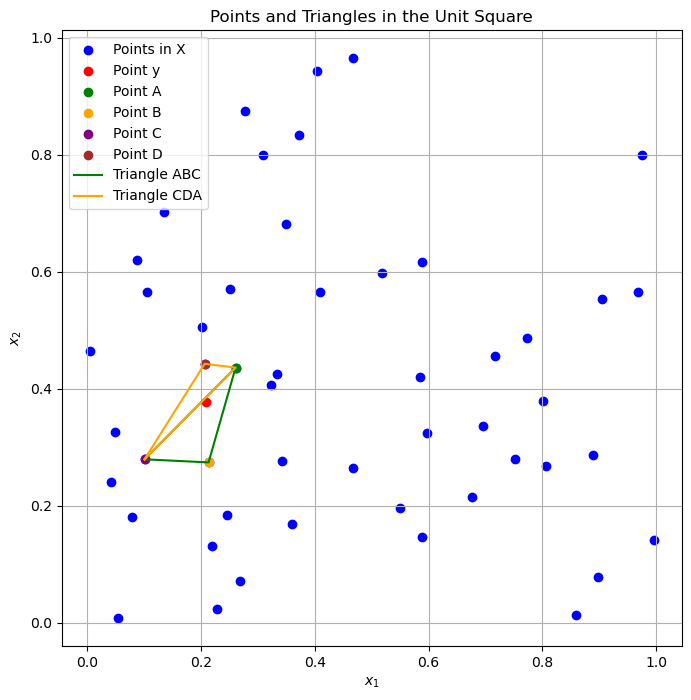

In [132]:
# Import the functions from the point_analysis module
from problem3 import find_A, find_B, find_C, find_D, plot_points_and_triangles

# Finding points A, B, C, and D
A = find_A(X, y)
B = find_B(X, y)
C = find_C(X, y)
D = find_D(X, y)

# Plotting the points and triangles
plot_points_and_triangles(X, y, A, B, C, D)

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [133]:
from problem3 import barycentric_coordinates, calculate_barycentric_coordinates

# Calculate barycentric coordinates
results, r_ABC, r_CDA = calculate_barycentric_coordinates(A, B, C, D, y)

# Extracting the individual barycentric coordinates for further use
if r_ABC is not None:
    r_ABC_1, r_ABC_2, r_ABC_3 = r_ABC
if r_CDA is not None:
    r_CDA_1, r_CDA_2, r_CDA_3 = r_CDA

Barycentric coordinates in triangle ABC: r1 = 0.6286, r2 = 0.0691, r3 = 0.3023
Barycentric coordinates in triangle CDA: r1 = 0.3683, r2 = -0.1339, r3 = 0.7657


It is given that a point, here the point $y$, is in side an arbitrary triangle, here $ABC$ or $CDA$ then $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$. From above we see that $r^{CDA}_2 < 0$ and therefor is $y$ not in the triangle $CDA$, but $r^{ABC}_1, r^{ABC}_2$ and $r^{ABC}_3 \in [0,1]$ so $y$ is inside $ABC$.


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [134]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [135]:
from problem3 import approximation, run_approximation

# Run the approximation
approximation_y, true_y = run_approximation(A, B, C, D, r_ABC_1, r_ABC_2, r_ABC_3, r_CDA_1, r_CDA_2, r_CDA_3, y)


Approximation of f(y): 0.08405201731052576
True value of f(y): 0.0789565216259594


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [136]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [137]:
def q3_y1(X, Y):
    results = []

    for i in range(len(Y)):
        A_1 = find_A(X, Y[i])
        B_1 = find_B(X, Y[i])
        C_1 = find_C(X, Y[i])
        D_1 = find_D(X, Y[i])
        
        #print(f'A_1 = {A_1}, B_1 = {B_1}, C_1 = {C_1}, D_1 = {D_1}')

        if not np.isnan(A_1[0]) and not np.isnan(B_1[0]) and not np.isnan(C_1[0]):
            r_ABC_1, r_ABC_2, r_ABC_3 = barycentric_coordinates(A_1, B_1, C_1, Y[i])
            #print(f'Barycentric coordinates in triangle ABC: r1 = {r_ABC_1:.4f}, r2 = {r_ABC_2:.4f}, r3 = {r_ABC_3:.4f}')
        if not np.isnan(C_1[0]) and not np.isnan(D_1[0]) and not np.isnan(A_1[0]):
            r_CDA_1, r_CDA_2, r_CDA_3 = barycentric_coordinates(C_1, D_1, A_1, Y[i])
            #print(f'Barycentric coordinates in triangle CDA: r1 = {r_CDA_1:.4f}, r2 = {r_CDA_2:.4f}, r3 = {r_CDA_3:.4f}')
            
        if not np.isnan(A_1[0]) and not np.isnan(B_1[0]) and not np.isnan(C_1[0]) and r_ABC_1 >= 0 and r_ABC_1<=1 and r_ABC_2 >= 0 and r_ABC_2<=1 and r_ABC_3 >= 0 and r_ABC_3<=1:
            approximation_y_1 = r_ABC_1 * f(A_1) + r_ABC_2 * f(B_1) + r_ABC_3 * f(C_1)
            true_y_1 = f(Y[i])
            print(f'Approximation of f(Y[{i}]): {approximation_y_1}')
            print(f'True value of f(Y[{i}]): {true_y_1}')
            results.append(approximation_y_1)
            continue  # Continue to the next iteration  # Return the approximation for the first valid triangle found

        elif not np.isnan(C_1[0]) and not np.isnan(D_1[0]) and not np.isnan(A_1[0]) and r_CDA_1 >= 0 and r_CDA_2 >= 0 and r_CDA_3 >= 0 and r_CDA_1<=1 and r_CDA_2<=1 and r_CDA_3<=1:
            approximation_y_1 = r_CDA_1 * f(C_1) + r_CDA_2 * f(D_1) + r_CDA_3 * f(A_1)
            true_y_1 = f(Y[i])
            print(f'Approximation of f(Y[{i}]): {approximation_y_1}')
            print(f'True value of f(Y[{i}]): {true_y_1}')
            results.append(approximation_y_1)
            continue  # Continue to the next iteration # Return the approximation for the second valid triangle found
        
        
        # If no valid triangle found for this Y[i], continue to next iteration
        else:
            true_y_1 = f(Y[i])
            print(f'No valid triangle found for Y[{i}].')
            print(f'True value of f(Y[{i}]): {true_y_1}')
    
    return np.nan  # If no valid triangles found for any Y[i], return NaN

# Assuming X, Y, find_A, find_B, find_C, find_D, barycentric_coordinates, and f are defined appropriately

# Call the function q3_y1 and print the results
approximation_y_1 = q3_y1(X, Y)

# Print the final result outside the function
#print(f'Final Approximation: {approximation_y_1}')

Approximation of f(Y[0]): 0.04032631372248057
True value of f(Y[0]): 0.04000000000000001
Approximation of f(Y[1]): 0.15874233999349835
True value of f(Y[1]): 0.16000000000000003
No valid triangle found for Y[2].
True value of f(Y[2]): 0.6400000000000001
Approximation of f(Y[3]): 0.15874233999349835
True value of f(Y[3]): 0.16000000000000003
Approximation of f(Y[4]): 0.2512901561119622
True value of f(Y[4]): 0.25
